In [12]:
import re, string,os
from glob import glob as gb
import pandas as pd
from tqdm import tqdm
from collections import Counter
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from functions import *

base_path = "/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase"

In [21]:
# Number of Speakers & Parties / Session
plotting.style_('tab20',12)

def find_info(language):
    data = data_loader.full(language,"lemmatized")
    data['date'] = [utils.find_date(x) for x in data['id']]
    data = utils.add_metadata(data,language)
    d = []
    for day in set(data['date']):
        t = data[data['date'] == day]
        d.append([day,len(set(t['speaker_party_name'])),len(set(t['speaker_id'])),t['words'].sum()])
    d = pd.DataFrame(d,columns="date unique_parties unique_speakers length_words".split(' '))
    d = d[d['date'].str.contains('2019|2020')].sort_values('date').reset_index(drop=True)
    return d

def plot_(d,col,title,language):
    fig,ax = plt.subplots(figsize=(25,5))
    p = plt.scatter(x=d['date'],y=d[col])
    plt.xlabel("Days",fontsize=16,labelpad=20)
    plt.ylabel("N",fontsize=16,labelpad=20)
    ax.tick_params(axis='x', pad=0)
    ax.xaxis.set_tick_params(rotation=45)
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % 7 != 0:
            label.set_visible(False)
    # m, b = np.polyfit([c for c,i in enumerate(d['date'])], d['unique_speakers'], 1)
    # plt.plot(d['date'], m*d['unique_speakers'] + b)
    plt.title(title + f" ({language.upper()})",fontsize=20)
    fig.savefig(f'{base_path}/results/plots/{col}-{language}.png',dpi=350, bbox_inches='tight')
    plt.show()

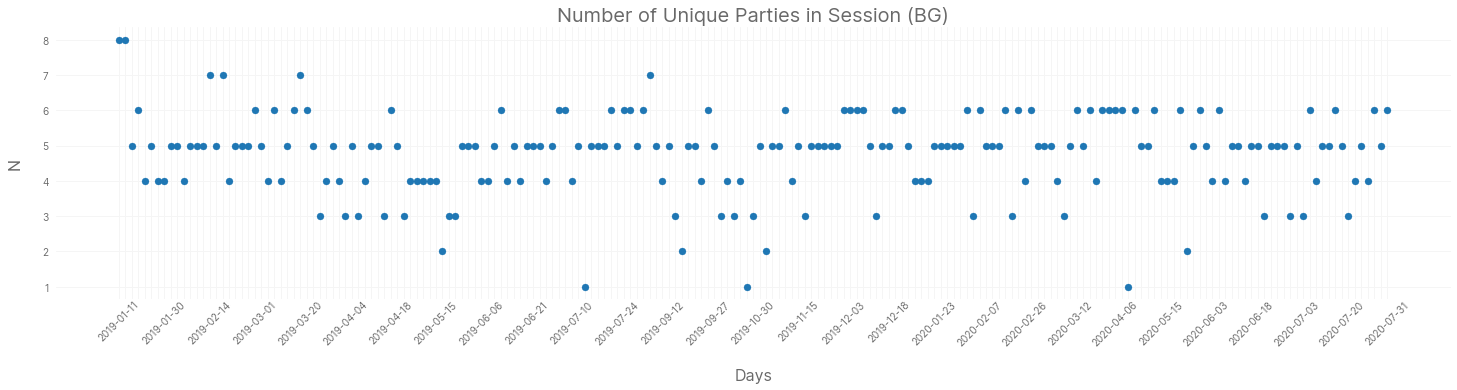

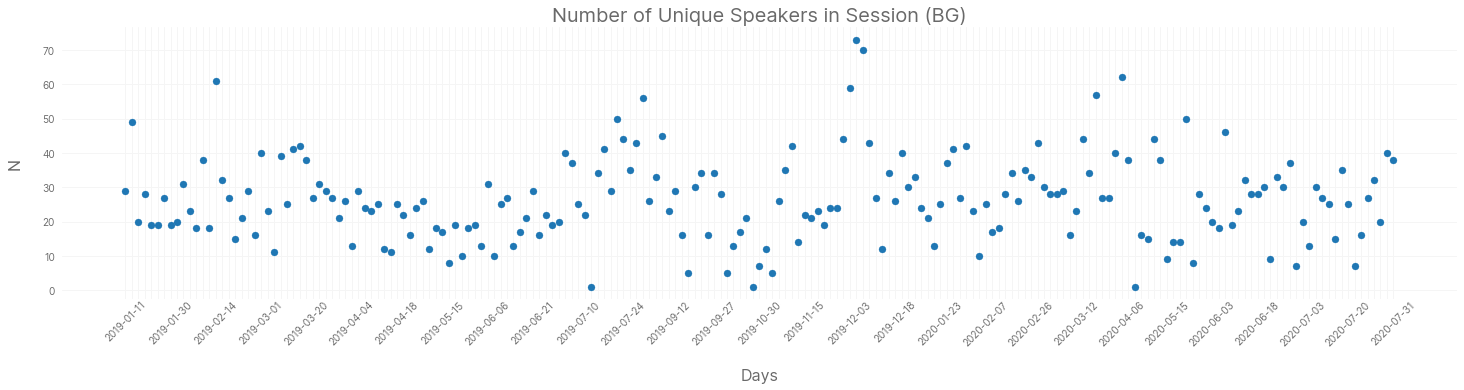

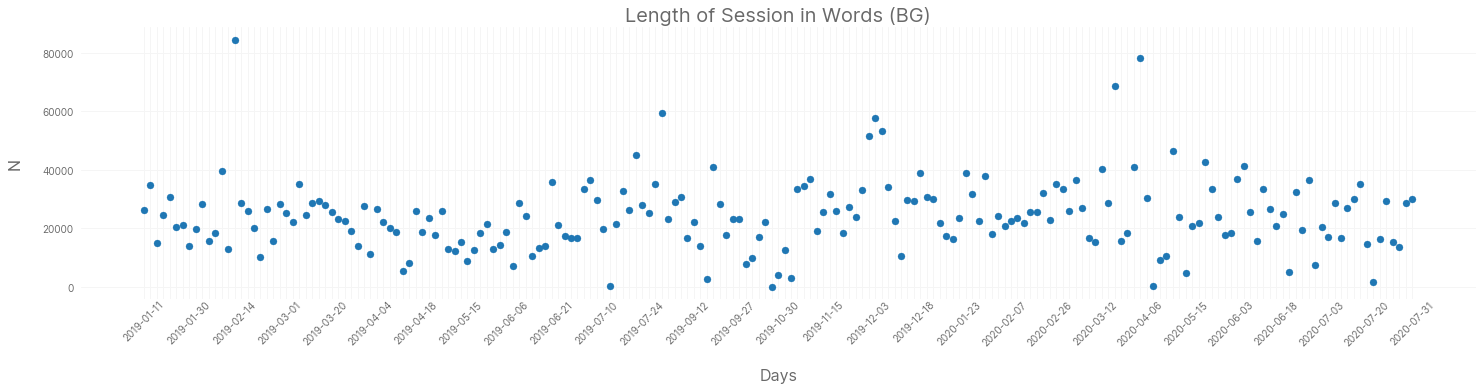

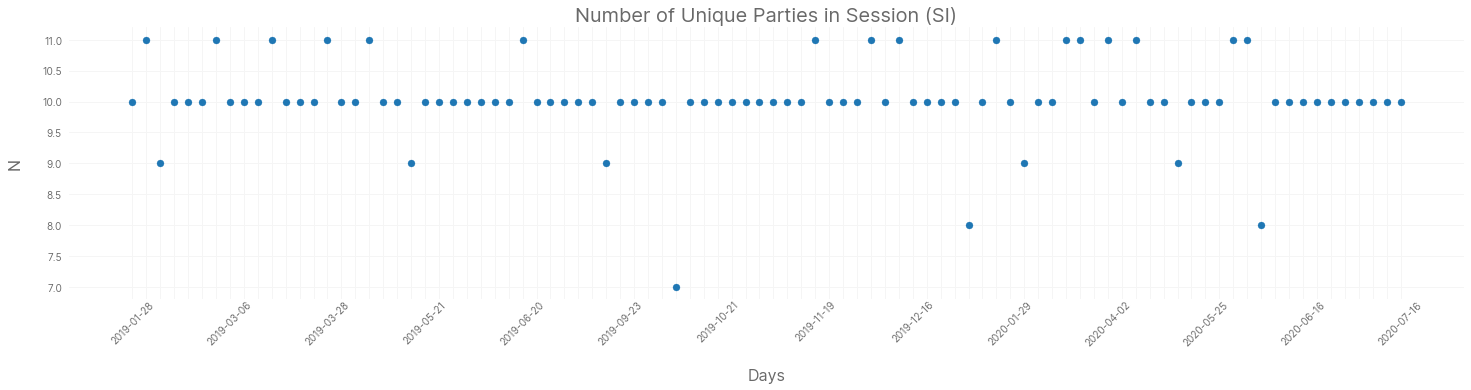

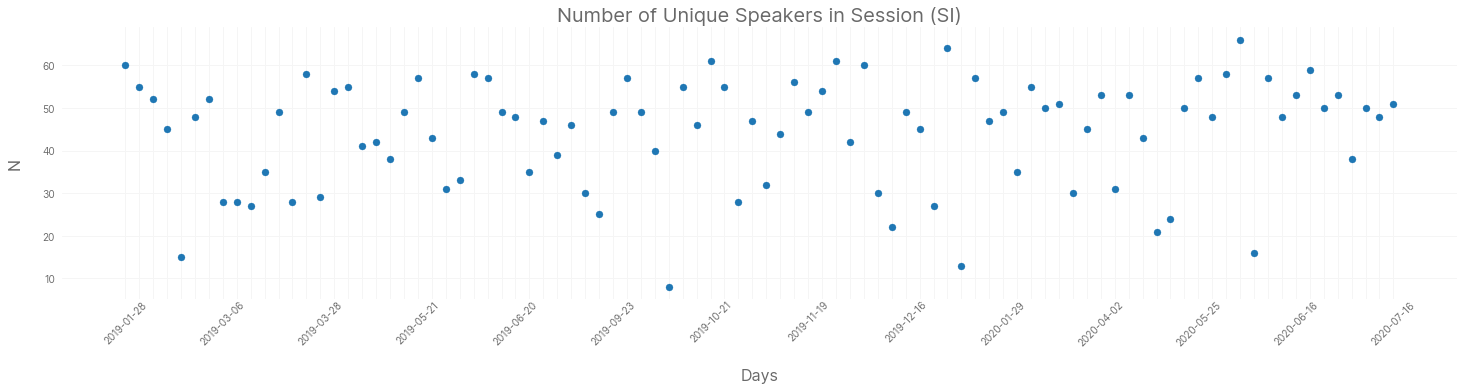

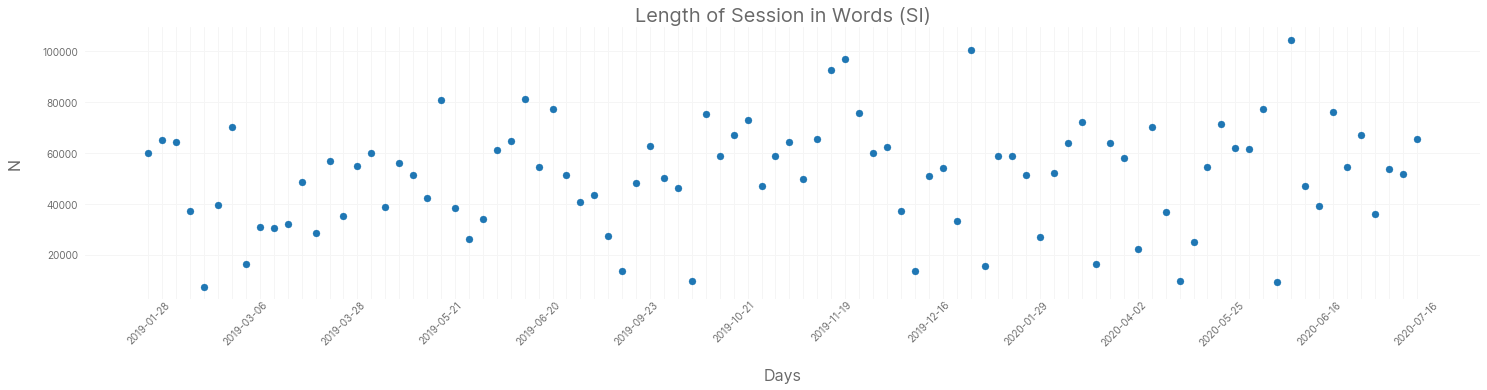

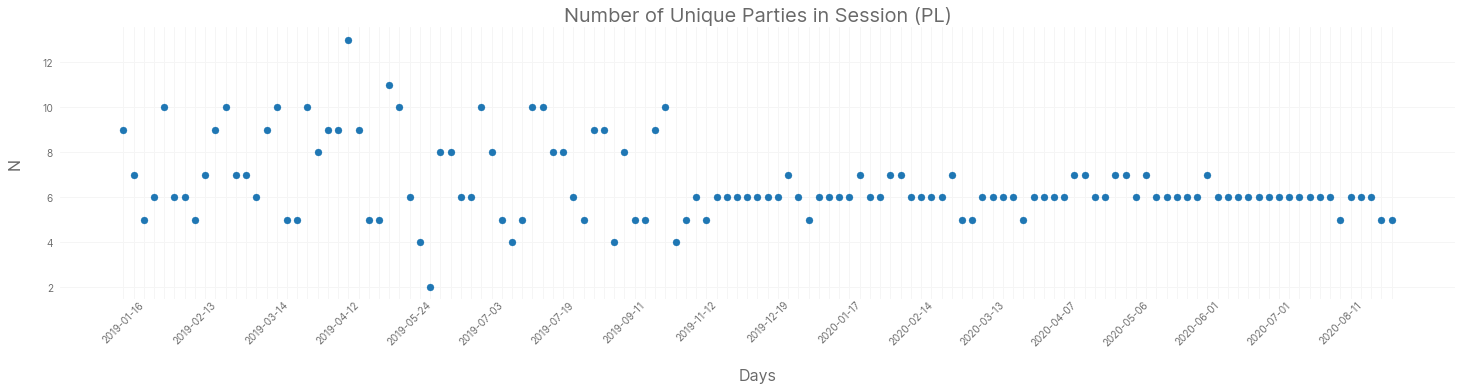

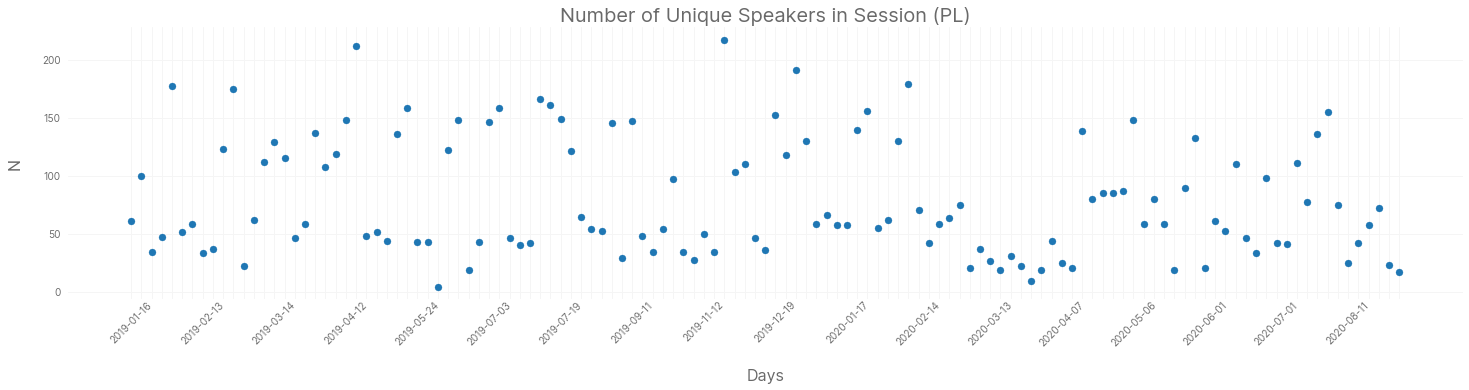

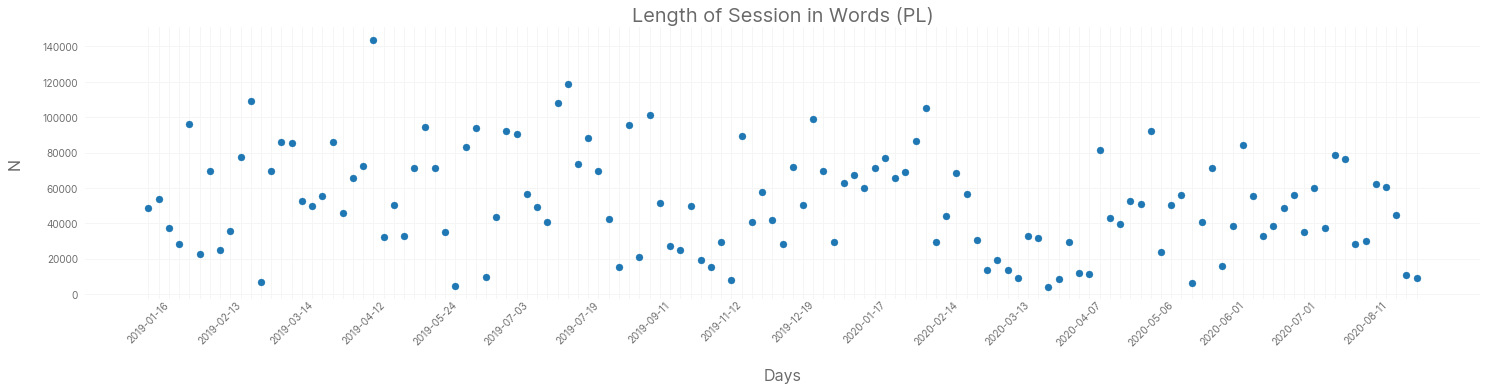

In [22]:
for l in ['bg','si','pl']:
    d = find_info(l)

    for e in [["unique_parties","Number of Unique Parties in Session"],["unique_speakers","Number of Unique Speakers in Session"],["length_words","Length of Session in Words"]]:
        plot_(d,e[0],e[1],l)